In [1]:
%load_ext autoreload
%autoreload

## Import Libraries

In [2]:
from typing import Dict

from torch.utils.data import DataLoader
from torchvision.transforms import ToPILImage
import torch.nn.functional as F
import torch
import torch.nn as nn
from torchvision.models import resnet18, resnet50
from torchvision.models.utils import load_state_dict_from_url
from typing import Type, Any, Callable, Union, List, Optional, cast
from torch import Tensor
from collections import OrderedDict
import pytorch_lightning as pl

from anomalib.datasets import MVTec, MVTecDataModule
from anomalib.models.stfpm import FeatureExtractor, FeaturePyramidLoss, StudentTeacherFeaturePyramidMatching

## Dataset

In [3]:
data_module = MVTecDataModule(root="./datasets/MVTec/", category="leather", batch_size=32, num_workers=36)
data_module.setup()
i, (image, mask) = next(enumerate(data_module.val_dataloader()))

In [4]:
image.shape, mask.shape

(torch.Size([32, 3, 256, 256]), torch.Size([32, 3, 256, 256]))

## Train

In [5]:
from argparse import ArgumentParser
from pytorch_lightning import Trainer

parser = ArgumentParser()
parser.add_argument("--dataroot", type=str, default="./datasets/MVTec")
parser.add_argument("--category", type=str, default="leather")

parser = StudentTeacherFeaturePyramidMatching.add_model_specific_args(parser)
parser = Trainer.add_argparse_args(parser)
args = parser.parse_args("")

trainer = Trainer(gpus=1, max_epochs=100)
datamodule = MVTecDataModule(args.dataroot, args.category, args.batch_size, args.num_workers)
model = StudentTeacherFeaturePyramidMatching(args)
trainer.fit(model=model, datamodule=datamodule)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
Dataset directory exists.
Dataset directory exists.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name          | Type               | Params
-----------------------------------------------------
0 | teacher_model | FeatureExtractor   | 11.7 M
1 | student_model | FeatureExtractor   | 11.7 M
2 | loss          | FeaturePyramidLoss | 0     
-----------------------------------------------------
11.7 M    Trainable params
11.7 M    Non-trainable params
23.4 M    Total params
93.516    Total estimated model params size (MB)


Epoch 0:  58%|█████▊    | 7/12 [00:02<00:01,  2.55it/s, loss=nan, v_num=32, val_loss=55.90, loss_step=56.80]

/home/sakcay/miniconda3/envs/stfpm/lib/python3.6/site-packages/pytorch_lightning/utilities/distributed.py:52: UserWarning: training_step returned None if it was on purpose, ignore this warning...
  warnings.warn(*args, **kwargs)


Epoch 0:  75%|███████▌  | 9/12 [00:02<00:00,  3.08it/s, loss=nan, v_num=32, val_loss=55.90, loss_step=56.70]
Validating: 0it [00:00, ?it/s]
Epoch 1:  67%|██████▋   | 8/12 [00:02<00:01,  2.77it/s, loss=nan, v_num=32, val_loss=57.70, loss_step=56.70, loss_epoch=55.00] 
Validating: 0it [00:00, ?it/s]
Epoch 2:  67%|██████▋   | 8/12 [00:02<00:01,  2.85it/s, loss=nan, v_num=32, val_loss=60.20, loss_step=56.70, loss_epoch=55.00] 
Validating: 0it [00:00, ?it/s]
Epoch 3:  67%|██████▋   | 8/12 [00:02<00:01,  2.93it/s, loss=nan, v_num=32, val_loss=60.20, loss_step=56.70, loss_epoch=55.00] 
Validating: 0it [00:00, ?it/s]
Epoch 4:  67%|██████▋   | 8/12 [00:02<00:01,  2.83it/s, loss=nan, v_num=32, val_loss=59.00, loss_step=56.70, loss_epoch=55.00] 
Validating: 0it [00:00, ?it/s]
Epoch 5:  67%|██████▋   | 8/12 [00:02<00:01,  2.79it/s, loss=nan, v_num=32, val_loss=58.00, loss_step=56.70, loss_epoch=55.00] 
Validating: 0it [00:00, ?it/s]
Epoch 6:  67%|██████▋   | 8/12 [00:02<00:01,  2.85it/s, loss=nan,

Epoch 23:  67%|██████▋   | 8/12 [00:02<00:01,  2.82it/s, loss=nan, v_num=32, val_loss=56.10, loss_step=56.70, loss_epoch=55.00] 
Validating: 0it [00:00, ?it/s]
Epoch 24:  67%|██████▋   | 8/12 [00:02<00:01,  2.75it/s, loss=nan, v_num=32, val_loss=56.10, loss_step=56.70, loss_epoch=55.00] 
Validating: 0it [00:00, ?it/s]
Epoch 25:  67%|██████▋   | 8/12 [00:02<00:01,  2.80it/s, loss=nan, v_num=32, val_loss=56.10, loss_step=56.70, loss_epoch=55.00] 
Validating: 0it [00:00, ?it/s]
Epoch 26:  67%|██████▋   | 8/12 [00:03<00:01,  2.64it/s, loss=nan, v_num=32, val_loss=56.10, loss_step=56.70, loss_epoch=55.00] 
Validating: 0it [00:00, ?it/s]
Epoch 27:  67%|██████▋   | 8/12 [00:02<00:01,  2.84it/s, loss=nan, v_num=32, val_loss=56.10, loss_step=56.70, loss_epoch=55.00] 
Validating: 0it [00:00, ?it/s]
Epoch 28:  67%|██████▋   | 8/12 [00:02<00:01,  2.81it/s, loss=nan, v_num=32, val_loss=56.10, loss_step=56.70, loss_epoch=55.00] 
Validating: 0it [00:00, ?it/s]
Epoch 29:  67%|██████▋   | 8/12 [00:02<0

/home/sakcay/miniconda3/envs/stfpm/lib/python3.6/site-packages/pytorch_lightning/utilities/distributed.py:52: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f8be2f2d048>>
Traceback (most recent call last):
  File "/home/sakcay/miniconda3/envs/stfpm/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    self._shutdown_workers()
  File "/home/sakcay/miniconda3/envs/stfpm/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 1174, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


1

## Test

In [ ]:
model = StudentTeacherFeaturePyramidMatching(args)

In [ ]:
# model.load_from_checkpoint(checkpoint_path="lightning_logs/version_30/checkpoints/epoch=11-step=95.ckpt")
model.load_from_checkpoint(checkpoint_path="lightning_logs/version_32/checkpoints/epoch=10-step=87.ckpt")
model.eval()

In [7]:
i, (image, true_mask) = next(enumerate(data_module.val_dataloader()))

In [ ]:
ToPILImage()(image[0])

In [ ]:
ToPILImage()(true_mask[0])

In [30]:
teacher_features = model.teacher_model(image)
student_features = model.student_model(image)

In [31]:
teacher_feature = teacher_features['layer2']
student_feature = student_features['layer2']

## Anomaly

In [35]:
pdist = torch.nn.PairwiseDistance(p=2, keepdim=True)

# Compute Distance.
fs_norm = torch.divide(student_feature, torch.norm(student_feature, p=2, dim=1, keepdim=True))
ft_norm = torch.divide(teacher_feature, torch.norm(teacher_feature, p=2, dim=1, keepdim=True))
a_map = 0.5*pdist(fs_norm, ft_norm)**2
a_map = F.interpolate(a_map, size=256, mode='bilinear', align_corners=False)

a_map = a_map[0,0,:,:].to('cpu').detach().numpy()
a_map.shape

(256, 256)

In [38]:
# Compute Distance.
distance = torch.nn.PairwiseDistance(p=2, keepdim=True)
norm_teacher_features = F.normalize(teacher_feature)
norm_student_features = F.normalize(student_feature)
layer_map = 0.5 * distance(norm_teacher_features, norm_student_features)
layer_map = F.interpolate(layer_map, size=256, mode='bilinear', align_corners=False)

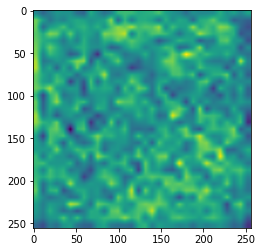

In [37]:
import matplotlib.pyplot as plt
plt.imshow(a_map)

In [ ]:
criterion = torch.nn.MSELoss(reduction='sum')
h, w = teacher_feature.shape[2:]
ft_norm = torch.divide(teacher_feature, torch.norm(teacher_feature, p=2, dim=1, keepdim=True))
fs_norm = torch.divide(student_feature, torch.norm(student_feature, p=2, dim=1, keepdim=True))
f_loss = (0.5/(w*h))*criterion(fs_norm, ft_norm)
f_loss

# pdist = torch.nn.PairwiseDistance(p=2, keepdim=True)

# amap1 = 0.5*pdist(fs_norm, ft_norm)**2

# amap1 = F.interpolate(amap1, size=256, mode='bilinear', align_corners=False)

In [ ]:
mse_loss = nn.MSELoss(reduction="sum")
height, width = teacher_feature.shape[2:]
norm_teacher_features = F.normalize(teacher_feature)
norm_student_features = F.normalize(student_feature)
layer_loss = (0.5/(width*height)) * mse_loss(norm_teacher_features, norm_student_features)
layer_loss

In [ ]:
mse_loss = nn.MSELoss(reduction="none")
h, w = teacher_feature.shape[2:]
norm_teacher_features = F.normalize(teacher_feature)
norm_student_features = F.normalize(student_feature)
layer_loss = mse_loss(norm_teacher_features, norm_student_features)
layer_loss = torch.mean(layer_loss)
layer_loss

In [ ]:
norm_teacher_features.shape, ft_norm.shape

In [ ]:
(norm_teacher_features - ft_norm).sum()

In [ ]:
amap1.shape

In [ ]:
feature_pyramid_loss = FeaturePyramidLoss()

amap2 = feature_pyramid_loss.cosine_similarity(teacher_feature, student_feature)
amap2 = F.interpolate(amap2, size=256, mode='bilinear', align_corners=False)

In [ ]:
feature_pyramid_loss(teacher_features, student_features)

In [ ]:

total_loss

In [ ]:
layer_losses.shape

In [ ]:
self = feature_pyramid_loss

In [ ]:
layer_losses = [self.compute_layer_loss(teacher_features[l], student_features[l]) for l in teacher_features.keys()]
layer_losses = torch.stack(losses, dim=1)  # Eq (3): (NxL)
total_loss = layer_losses.sum()  # Eq (3): (N)
total_loss

In [ ]:
layer_losses

In [ ]:
layer_losses

In [ ]:
layer_losses.shape, layer_loss.shape

In [ ]:
total_losses = []
for layer_loss in layer_losses:
    h, w = layer_loss.shape
    total_loss = 0
    for i in range(h):
        for j in range(w):
            total_loss += layer_loss[i, j]

    total_loss = total_loss / (h * w)
    total_losses.append(total_loss)

In [ ]:
total_losses

In [ ]:
layer_losses.shape

In [ ]:
torch.mean(layer_losses, dim=0).shape

In [ ]:
torch.stack(layer_losses, dim=1).sum(dim=1).shape

In [ ]:
layer_loss(teacher_feature, student_feature).shape

In [ ]:
mse_loss = nn.MSELoss(reduction="none")
norm_teacher_features = F.normalize(teacher_feature)
norm_student_features = F.normalize(student_feature)
layer_loss = 0.5 * mse_loss(norm_teacher_features, norm_student_features)
layer_loss.shape

In [ ]:
layer_loss.shape

In [ ]:
torch.mean(layer_loss, dim=(1,2,3))

### Heatmap

In [ ]:
anomap = layer_loss(teacher_feature, student_feature)
anomap = m(anomap)

# heatmap = torch.mean(anomap[0], 1)

In [ ]:
ToPILImage()(anomap[0][0])

In [ ]:
m = torch.nn.Upsample(size=(256, 256), mode='bilinear', align_corners=False)
# ToPILImage()(m(heatmap))

In [ ]:
ToPILImage()(heatmap)

In [ ]:
nn.MSELoss(reduction="mean")(teacher_feature, student_feature)